# O que os Santos católicos vão te ensinar sobre manipulação de dados?
### spoiler: Web Scraping e Wordcloud

![Imagem de santos católicos](./img/logo_santos.jpg)

Trazer coisas que nós gostamos para a área do nosso trabalho é sempre bem instigante. Pois bem, aqui não será diferente, como sou católico, resolvi brincar um pouco com as frases de vários Santos da Igreja, a fim de colher alguns ensinamentos disso tudo, tanto espirituais como técnicos.

Nosso plano de ação é o seguinte: Vamos aprender técnicas de **Web Scraping** e **Wordcloud**. Primeiro faremos o webscrapping dessa matéria do [Aleteia](https://pt.aleteia.org/2016/03/22/365-frases-de-santos/). Ela contêm 365 frases de Santos católicos, em seguida pegaremos as frases desses Santos e criaremos uma nuvem de palavras, é uma espécie de Mosaico onde as palavras mais repetidas são as que ficam mais em evidência.

In [4]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
import requests

É aqui onde mágica começa. Iniciamos com o método GET da biblioteca *requests* para obter o html da página. Em seguida, passamos esse html para a função BeautifulSoup.

In [12]:
# Nossa requisição à página
html = requests.get("https://pt.aleteia.org/2016/03/22/365-frases-de-santos/").text
soup = BeautifulSoup(html, "html.parser")

#### Vamos agora criar duas listas:
- A primeira será uma lista de frases. Cada elemento dessa lista é uma frase inserida dentro de uma tag html p.
- A segunda é uma lista vazia onde adicionaremos as palavras. 

In [14]:
frases = [p.text for p in soup('p')]
palavras = []

for frase in frases:
  # transformamos cada uma das frases em uma lista que tem como elementos as palavras dessa frase.
  frase = frase.split()
  for palavra in frase:
    # aqui há uma pequena correção, para que nosso programa não diferencie as palavras, pois algumas terminam com ","
    if palavra == 'Deus' or palavra == 'Deus,':
      palavra = 'Deus'
    if len(palavra) > 1:
      palavras.append(palavra.capitalize()) # lista de palavras ganhando elementos


Agora é possível fazer uma listagem das palavras mais frequentes.

In [18]:
# listando os 30 termos mais frequentes
from collections import Counter
Counter(palavras).most_common(30)

[('De', 385),
 ('Que', 256),
 ('(santa', 168),
 ('Deus', 152),
 ('Da', 150),
 ('Teresa', 147),
 ('Jesus)', 143),
 ('Não', 98),
 ('Em', 94),
 ('Se', 89),
 ('Do', 88),
 ('Para', 87),
 ('Maria', 83),
 ('(beata', 68),
 ('Por', 63),
 ('Dos', 61),
 ('No', 57),
 ('Mais', 56),
 ('Com', 55),
 ('Cruz)', 54),
 ('Amor', 51),
 ('Como', 48),
 ('Nos', 44),
 ('Sua', 43),
 ('Na', 41),
 ('Andes)', 40),
 ('Maravilhas', 39),
 ('Tudo', 39),
 ('Jesus', 38),
 ('Benedita', 37)]

### Montando Wordcloud
- Para isso, é necessário transformar nossa lista de palavras em uma grande string com todas as palavras
- Vamos também definir as *stopwords* que são palavras que não agregam para nossa análise, nesse caso são preposições, nomes dos Santos, etc.

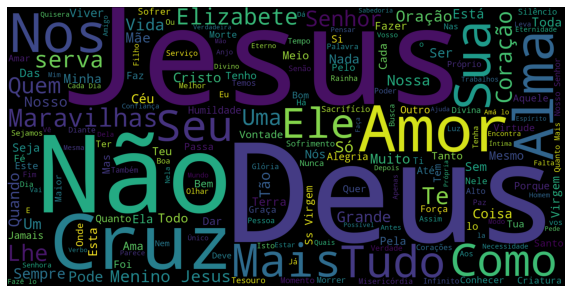

In [19]:
# concatenar as palavras
conjunto_palavras = " ".join(x for x in palavras)

# definindo palavras que não agregam 
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "que", "para", "quero", "esse", "por", "isso", "pois", "com", "Teresa", "Beata", "Maria", "Benedita", "João", "Madre", " Elizabete", "Trindade", "José", "Teresinha", "na", "santa", "dos", "são", "Deu", "se", "Andes"])

# gerando wordcloud
wordcloud = WordCloud(stopwords = stopwords, background_color="black", width=1600, height=800).generate(conjunto_palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("santos.png")

Voilà! Temos o nosso wordcloud, mas para deixar um efeito visual ainda mais marcante, que tal usarmos uma imagem de fundo?

![mascara](img/mascara_cristo.png))

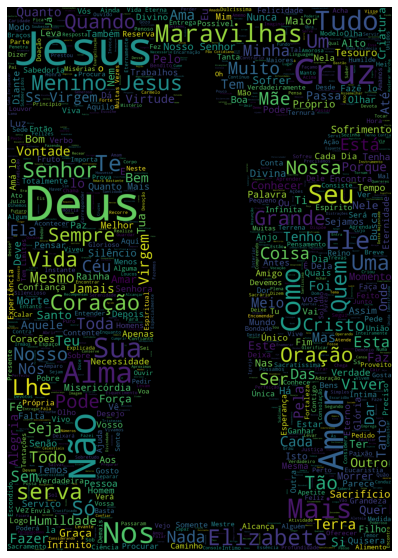

In [23]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("./img/mascara_cristo.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800, max_words=1000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(conjunto_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("santos_mask.png")

Agora sim, hein? O Cristo Redentor nos mostrando algumas das palavras mais valiosas. Nas frases dos Santos as palavras mais frequentes foram: 
- Maravilhas, Jesus, Oração, Deus, Cristo, Vida, Alma, Coração, Cruz, Senhor, amor, infinito, vontade. 
Já dá pra tirar alguns temas bem legais pra falar no seu grupo de oração né?

Tenho uma sugestão. Se você mudar o atributo background-color para "white" vai ter outro resultado bem legal.

## Considerações finais
É notável o aumento de estímulo quando estudamos algo auxiliados por uma temática que é relevante para nós! Fica a sugestão para que você faça projetos com aquilo que te interessa e possa agregar à sua vida.

Alguns questionamentos podem surgir como: Pra que o Webscrapping se nesse exemplo um simples ctrl C + ctrl V resolveria? Concordo com você, para exemplos básicos como esse o caminho mais simples é sempre a melhor opção. Contudo, como esse artigo tens fins educacionais, tanto para você que está lendo como para mim, optei por utilzar essa técnica, a fim de melhorar meu domínio dela.

Tem alguma sugestão? Ou gostaria de indicar algo que eu não levei em consideração e seria essencial nessa análise? Deixa aqui nos comentários, ficarei feliz em receber teu direcionamento

### FONTES
- [Artigo que usei como base para aprender Wordcloud](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/)
- [Site católico que usei como minha base de dados](https://pt.aleteia.org/2016/03/22/365-frases-de-santos/)